# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1357.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           7.03e-45
Time:                        13:20:34   Log-Likelihood:                 10.584
No. Observations:                  50   AIC:                            -13.17
Df Residuals:                      46   BIC:                            -5.521
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0724      0.070     72.899      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.56715855  5.02987273  5.4564524   5.82232694  6.11179314  6.32059518
  6.45662389  6.53862023  6.5930963   6.64997939  6.73769508  6.87849693
  7.08481036  7.35719112  7.68423403  8.04444677  8.40978107  8.75024091
  9.0388108   9.25589435  9.39253389  9.45188223  9.44868458  9.40685605
  9.3555524   9.32437986  9.33853088  9.41464512  9.5580756   9.76200916
 10.00858591 10.27183352 10.52193441 10.73012469 10.87342001 10.93839177
 10.92337348 10.83873446 10.7051763  10.55033155 10.40422383 10.29433502
 10.24109005 10.25450115 10.3325229  10.46138822 10.61787033 10.7730988
 10.8973029  10.96470285]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.94503288 10.80522617 10.56296312 10.25853516  9.94497995  9.67509597
  9.48851557  9.40200159  9.40534326  9.46385612]


## Plot comparison

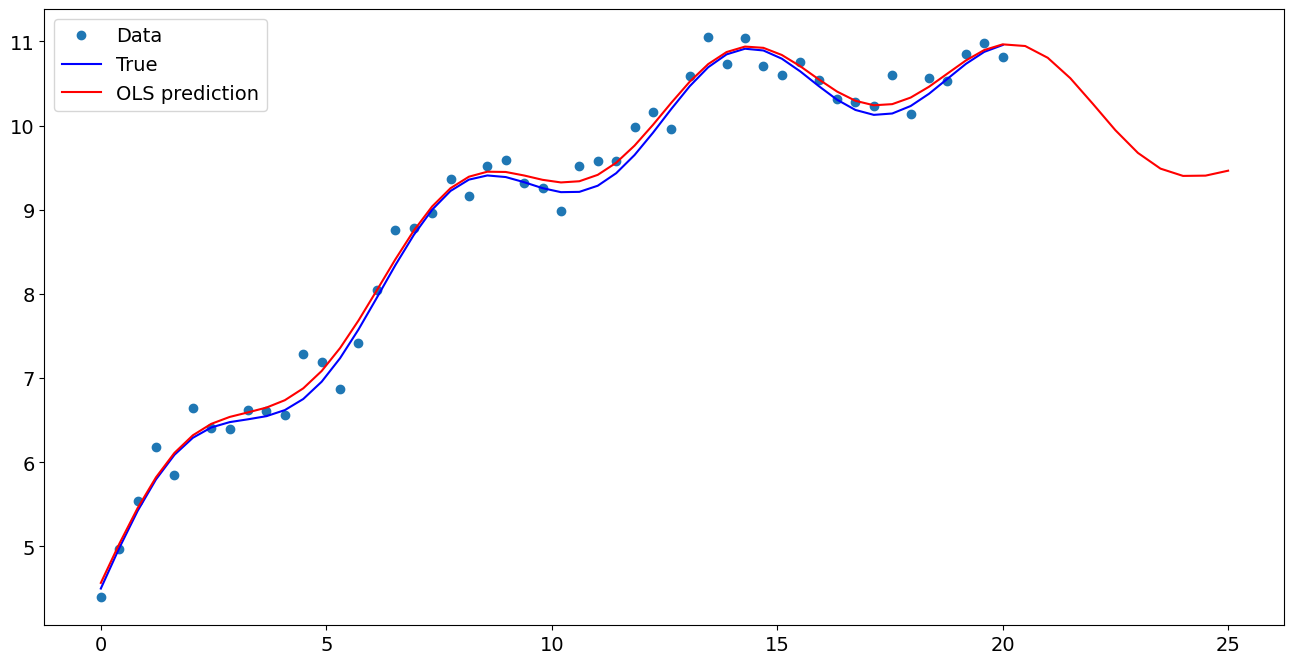

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.072372
x1                  0.501383
np.sin(x1)          0.450844
I((x1 - 5) ** 2)   -0.020209
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.945033
1    10.805226
2    10.562963
3    10.258535
4     9.944980
5     9.675096
6     9.488516
7     9.402002
8     9.405343
9     9.463856
dtype: float64